In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors
%matplotlib inline

import glob
import os
import random

In [13]:
df = pd.DataFrame()

for csv in glob.glob('./raw_subset/*.csv'):
    id = os.path.splitext(os.path.basename(csv))[0]
    new = pd.DataFrame(pd.read_csv(csv, header=None, skiprows=[0])).iloc[:, :-2]
    new['id'] = id
    df = df.append(new)

columns = list(pd.read_csv('./raw_subset/1.csv', header=0).columns[:-2]) + ['id']
df.columns = columns
df.set_index(['id', 'index'], inplace=True)

In [14]:
df.head(2)

time   L_x  L_y  L_z   C_x  C_y  C_z  F_x  F_y  F_z  ...  \
id index                                                        ...   
6  1      0.000   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  1.0  ...   
   2      0.063 -15.5  2.1 -4.1 -19.8  2.0 -4.2  1.0  0.0  0.0  ...   

          circle_3d_normal_x  circle_3d_normal_y  circle_3d_normal_z  \
id index                                                               
6  1               -0.050324            0.372906           -0.926503   
   2               -0.050324            0.372906           -0.926503   

          circle_3d_radius     theta       phi  projected_sphere_center_x  \
id index                                                                    
6  1          3.910000e-08  1.952935 -1.625059                  353.67621   
   2          3.930000e-08  1.952935 -1.625059                  353.67621   

          projected_sphere_center_y  projected_sphere_axis_a  \
id index                                                       
6  1                      -9.542156              1338.365184   
   2                      -9.542156              1338.365184   

          projected_sphere_axis_b  
id index                           
6  1                  1338.365184  
   2                  1338.365184  

[2 rows x 41 columns]

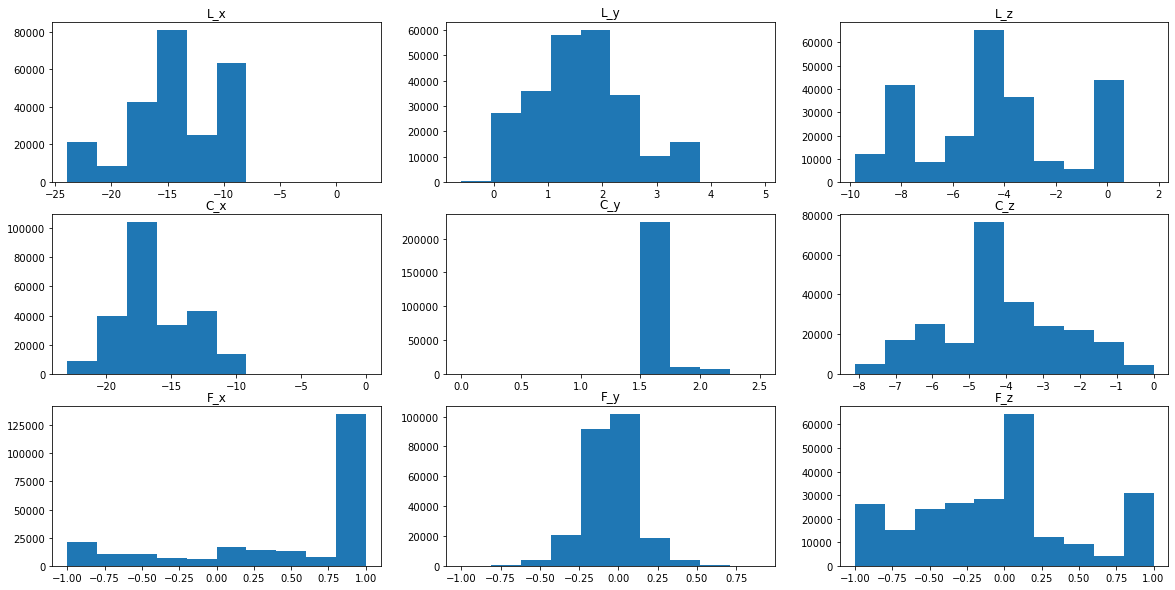

In [15]:
fig, axs = plt.subplots(3, 3, figsize=(20,10))
for i, col in enumerate(df.columns[1:10]):
  axs[i//3, i%3].hist(df[col])
  axs[i//3, i%3].set_title(col)

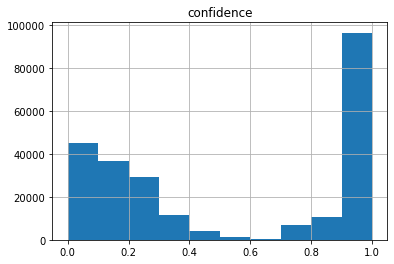

In [16]:
df.hist(column='confidence');

In [17]:
relevant = ['time', 'L_x', 'L_y', 'L_z', 'C_x', 'C_y', 'C_z', 'confidence']
df = df[relevant]

In [18]:
df.head()

time   L_x  L_y  L_z   C_x  C_y  C_z  confidence
id index                                                   
6  1      0.000   0.0  0.0  0.0   0.0  0.0  0.0    1.000000
   2      0.063 -15.5  2.1 -4.1 -19.8  2.0 -4.2    0.919445
   3      0.095 -15.5  2.1 -4.1 -19.8  2.0 -4.2    0.876950
   4      0.128 -15.5  1.9 -4.1 -19.8  1.7 -4.2    0.861915
   5      0.196 -15.5  1.9 -4.1 -19.8  1.7 -4.2    0.883676

In [19]:
# Drop repeated consecutive times (drop first)
df = df.loc[df['time'].shift() != df['time']]

# Drop row at time 0.000 (index 1) as these are not accurate
df = df.loc[df['time'] != 0.000]

# Keep only confident eye tracking coords for eye path analysis
df_eye = df[df['confidence'] > 0.6]

# Remove some outlier PoG eye measurments (some are outside of the room coordinates)
df_eye = df_eye[(df_eye['L_x'] >= -23.9) & (df_eye['L_x'] <= -9)]
df_eye = df_eye[(df_eye['L_y'] >= 0) & (df_eye['L_y'] <= 3.7)]
df_eye = df_eye[(df_eye['L_z'] >= -9.7) & (df_eye['L_z'] <= 0.4)]

df.drop(['L_x', 'L_y', 'L_z'], axis=1, inplace=True)
df_eye.drop(['time', 'C_x', 'C_y', 'C_z', 'confidence'], axis=1, inplace=True)



In [20]:
df = pd.merge(df.reset_index(), df_eye.reset_index(), how='left', on=['id', 'index']).set_index(keys=['id', 'index'])

In [21]:
df.tail(20)

time   C_x  C_y  C_z  confidence   L_x  L_y  L_z
id index                                                    
59 4246   119.68 -18.0  1.7 -4.9    0.091526   NaN  NaN  NaN
   4247   119.71 -18.0  1.7 -4.9    0.091526   NaN  NaN  NaN
   4249   119.75 -18.0  1.7 -4.9    0.990000 -12.2  3.5 -5.2
   4250   119.78 -18.0  1.7 -4.9    0.237456   NaN  NaN  NaN
   4251   119.82 -18.0  1.7 -4.9    0.224075   NaN  NaN  NaN
   4253   119.85 -18.0  1.7 -4.9    0.990000 -11.8  3.4 -5.2
   4254   119.88 -18.0  1.7 -4.9    1.000000 -11.8  3.4 -5.2
   4255   119.91 -18.0  1.7 -4.9    1.000000 -11.8  3.4 -5.2
   4257   119.94 -18.0  1.7 -4.9    1.000000 -12.0  3.5 -5.2
   4258   119.98 -18.0  1.7 -4.9    1.000000 -11.9  3.5 -5.2
   4259   120.01 -18.0  1.7 -4.9    1.000000 -11.9  3.5 -5.2
   4261   120.04 -18.0  1.7 -4.9    0.304478   NaN  NaN  NaN
   4262   120.07 -18.0  1.7 -4.9    0.200339   NaN  NaN  NaN
   4263   120.11 -18.0  1.7 -4.9    0.200339   NaN  NaN  NaN
   4265   120.14 -18.0  1.7 -4.9    1.000000 -11.9  3.5 -5.5
   4266   120.17 -18.0  1.7 -4.9    1.000000 -11.9  3.5 -5.5
   4267   120.21 -18.0  1.7 -4.9    1.000000 -11.9  3.5 -5.5
   4268   120.24 -18.0  1.7 -4.9    1.000000 -11.9  3.5 -5.5
   4269   120.28 -18.0  1.7 -4.9    1.000000 -11.9  3.5 -5.4
   4270   120.31 -18.0  1.7 -4.9    1.000000 -12.6  3.3 -5.4

## Metrics

In [22]:
import math
def distance_3d(x1, y1, z1, x2, y2, z2):
  return math.sqrt((x2-x1)**2 + (y2-y1)**2 + (z2-z1)**2)

def distance_2d(x1, z1, x2, z2):
  return math.sqrt((x2-x1)**2 + (z2-z1)**2)

In [33]:
C_metrics = {}

In [34]:
for id in df.reset_index().id.unique():
  user_df = df.loc[id]
  pt = user_df.iloc[0, 0]
  px, py, pz = user_df.iloc[0, 1:4]

  distances = []
  velocities = []
  times = []
  for j in range(1, len(user_df.iloc[1:, 1:4]) + 1):
    x, y, z = user_df.iloc[j, 1:4]
    t = user_df.iloc[j, 0]
    d = distance_3d(px, py, pz, x, y, z)
    distances.append(d)
    velocities.append(d / (t - pt))
    times.append(t)
    pt = t
    px, py, pz = x, y, z

  C_metrics[id] = {'v': velocities, 't': times, 'step_d': distances}

# Camera Movement Analysis

From stepwise velocity through path segmentations and sinuosity

In [35]:
random.seed(747)
sample = random.sample(C_metrics.keys(), 10)

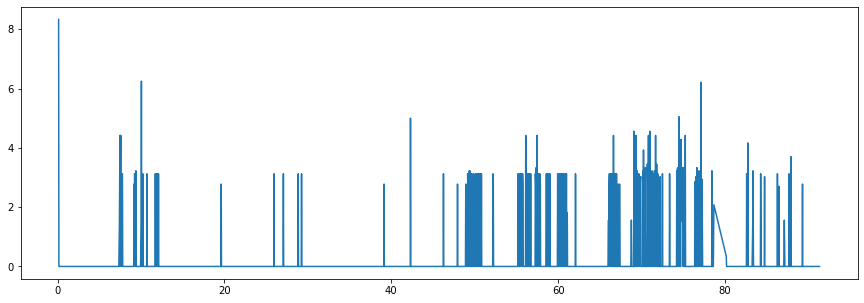

In [36]:
fig, ax = plt.subplots(figsize=(15,5))
# for k, v in C_velocities.items():
ax.plot(C_metrics['5']['t'], C_metrics['5']['v'])

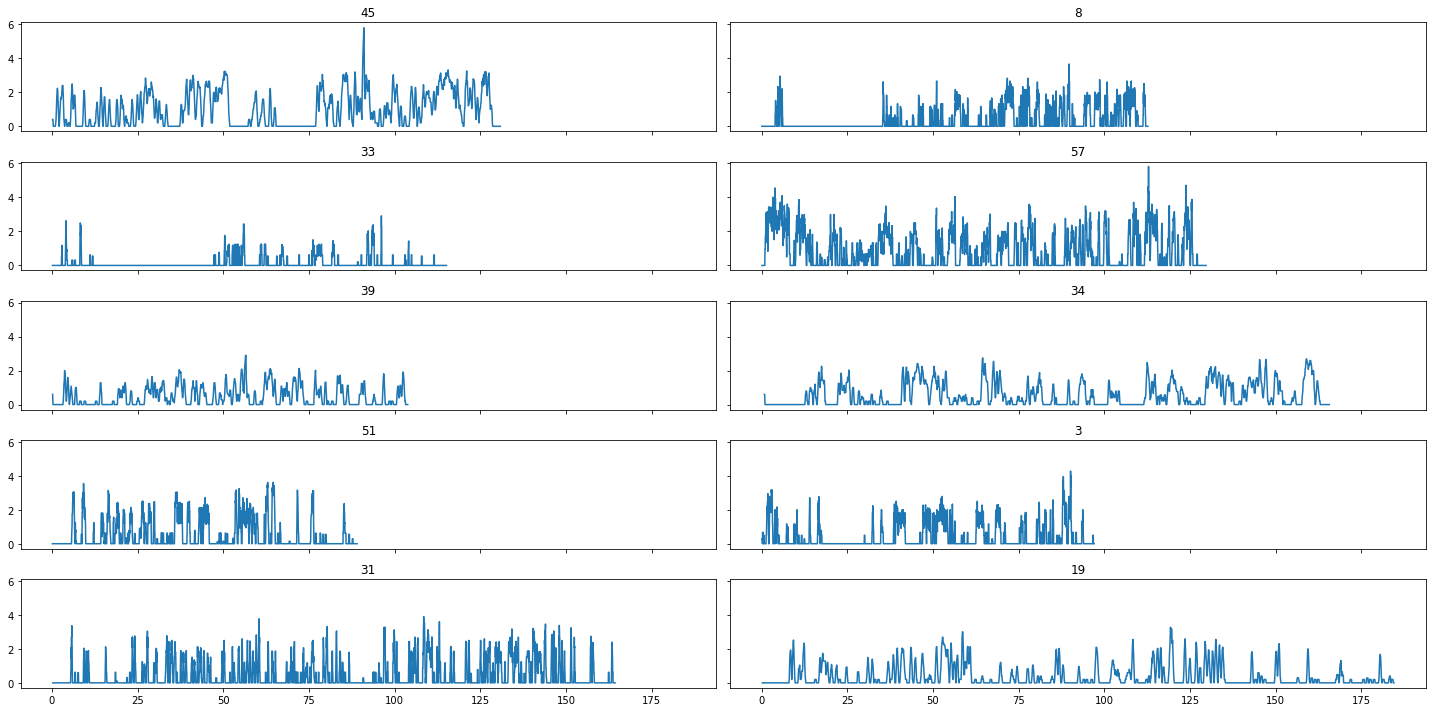

In [37]:
# Plot smoothed moving average speeds
window = 5

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

for k in C_metrics.keys():
    C_metrics[k]['ma_v'] = moving_average(C_metrics[k]['v'], window)

fig, ax = plt.subplots(5, 2, figsize=(20,10), sharey=True, sharex=True)

for i, k in enumerate(sample):
    ax[i//ax.shape[1], i%ax.shape[1]].plot(C_metrics[k]['t'][:-window + 1], C_metrics[k]['ma_v'])
    ax[i//ax.shape[1], i%ax.shape[1]].set_title(k)

fig.tight_layout()

In [38]:
# Create path segmentations where users stay still for n seconds to look at something
# Type of simple change point analysis

# New paths start when movement begins again

# Number of seconds to break path on no movement
path_break = 1

for k, v in C_metrics.items():
    path_breaks = []
    last_motion = 0 # time of last motion
    waiting_for_next_motion = True
    for i, vel in enumerate(v['v']):
        if vel != 0:
            last_motion = v['t'][i]
            if waiting_for_next_motion:
                path_breaks.append(i)
                waiting_for_next_motion = False
        elif v['t'][i] - last_motion > path_break:
            waiting_for_next_motion = True
    path_breaks.append(len(v['v']))
    C_metrics[k]['path_breaks'] = path_breaks

print(C_metrics['3']['path_breaks'])

[1, 198, 260, 386, 456, 834, 896, 967, 1069, 1285, 1623, 1742, 1876, 2101, 2240, 2406, 2608, 2698, 2711]


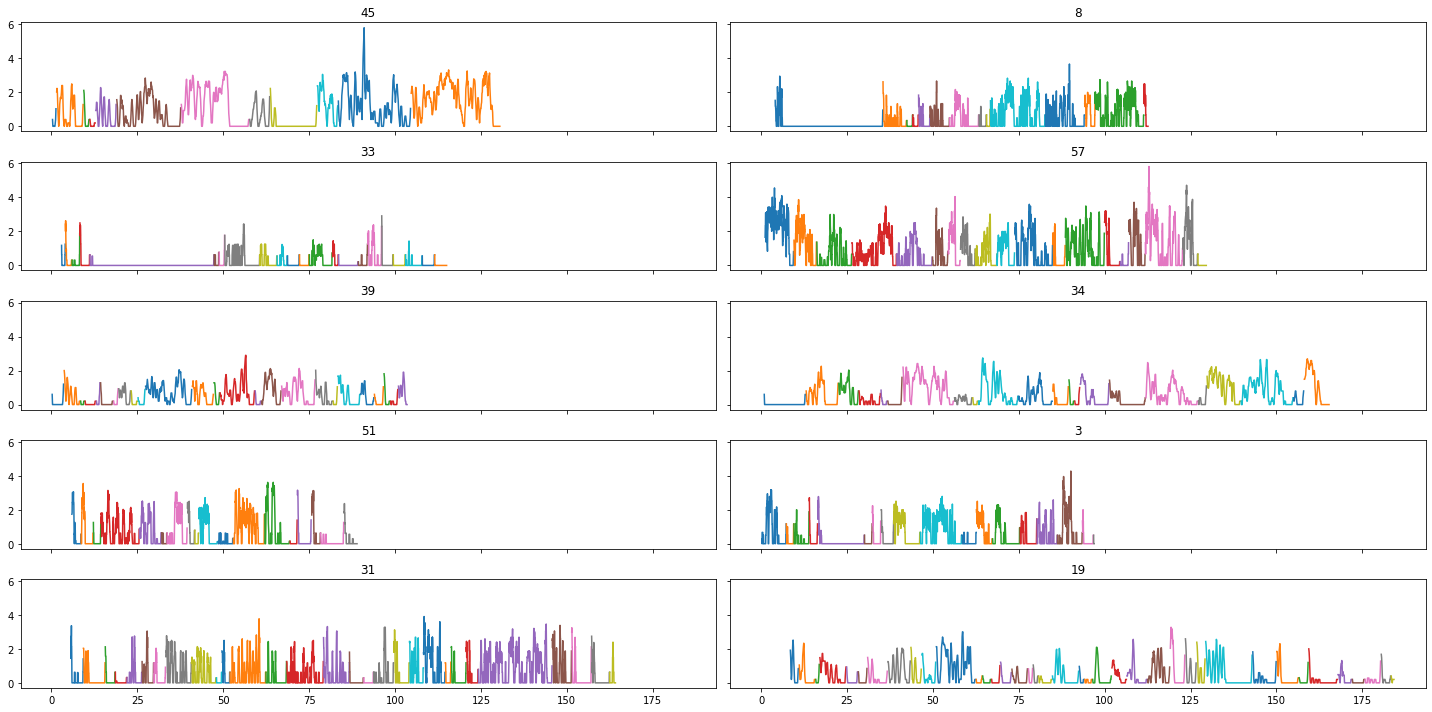

In [39]:
fig, ax = plt.subplots(5, 2, figsize=(20,10), sharey=True, sharex=True)

# random.sample(C_velocities.keys(), ax.size)
# sorted(list(C_velocities.keys()), key=lambda x: int(x))[:ax.size]
for i, k in enumerate(sample):
    ex = C_metrics[k]
    for path_start, path_end in zip(ex['path_breaks'], ex['path_breaks'][1:]):
        path_end -= 1
        if path_end > len(ex['ma_v']):
            path_end -= window + 1
        ax[i//ax.shape[1], i%ax.shape[1]].plot(ex['t'][path_start:path_end], ex['ma_v'][path_start:path_end])
        ax[i//ax.shape[1], i%ax.shape[1]].set_title(k)
fig.tight_layout()

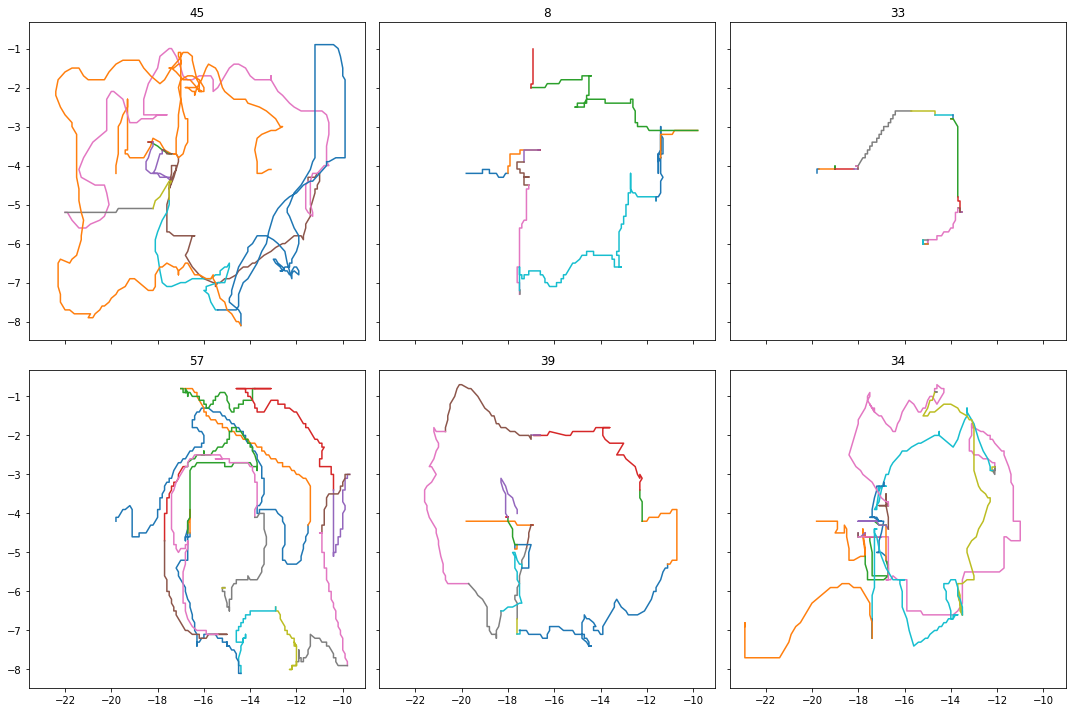

In [40]:
fig, ax = plt.subplots(2, 3, figsize=(15,10), sharey=True, sharex=True)

for i, k in enumerate(sample[:ax.size]):
    ex = C_metrics[k]
    user_df = df.loc[k]
    for path_start, path_end in zip(ex['path_breaks'], ex['path_breaks'][1:]):
        path_end -= 1
        if path_end > len(ex['ma_v']):
            path_end -= window + 1
        
        ax[i//ax.shape[1], i%ax.shape[1]].plot(user_df['C_x'].iloc[path_start:path_end], user_df['C_z'].iloc[path_start:path_end])
        ax[i//ax.shape[1], i%ax.shape[1]].set_title(k)
fig.tight_layout()

In [41]:
# Sinuosity calculated as D/L as per https://doi.org/10.1016/j.jtbi.2004.03.016
# Path velocities also calculated

for k, v in C_metrics.items():
    user_df = df.loc[k]
    sinuosities = []
    velocities = []
    for path_start, path_end in zip(v['path_breaks'], v['path_breaks'][1:]):
        s, e = user_df.iloc[path_start], user_df.iloc[path_end]
        D = distance_3d(s['C_x'], s['C_y'], s['C_z'],
                        e['C_x'], e['C_y'], e['C_z'])
        L = 0
        for i in range(path_start, path_end):
            L += v['step_d'][i]
        sinuosities.append(D/L)
        velocities.append(np.mean(v['v'][path_start:path_end][:np.max(np.nonzero(v['v'][path_start:path_end])) + 1]))
    C_metrics[k]['path_sinuosities'] = sinuosities
    C_metrics[k]['path_velocities'] = velocities


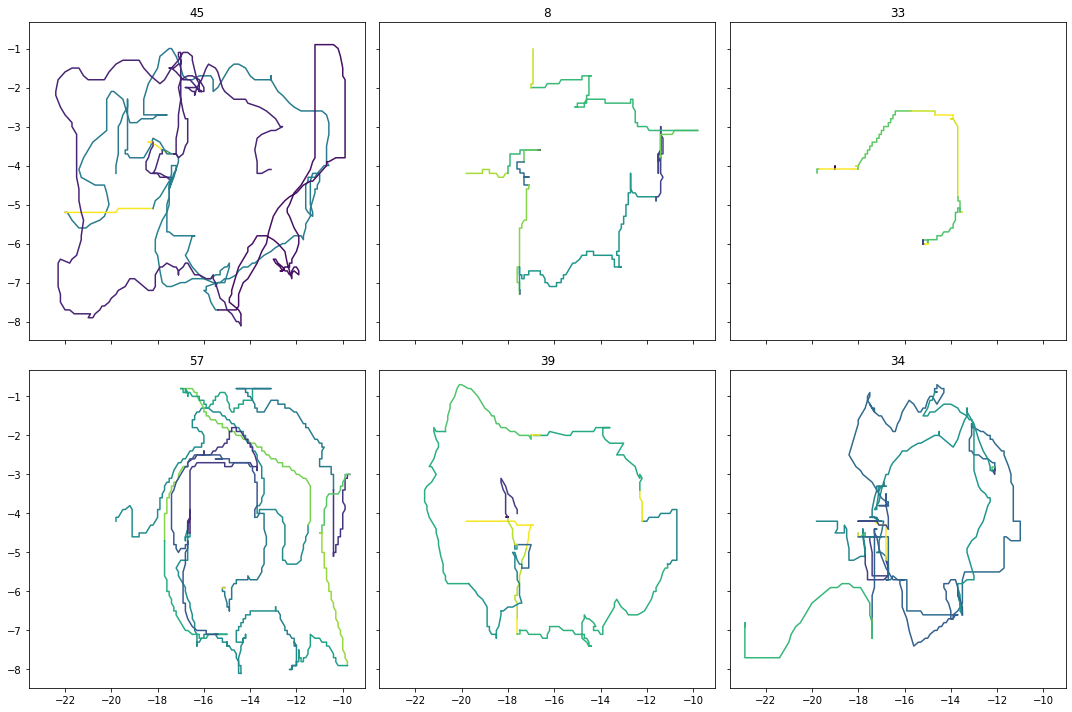

In [42]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10), sharey=True, sharex=True)

norm = plt.Normalize(0, 1)
cm_norm = plt.cm.ScalarMappable(norm=norm, cmap='viridis')

for i, k in enumerate(sample[:ax.size]):
    ex = C_metrics[k]
    user_df = df.loc[k]
    for path_start, path_end in zip(ex['path_breaks'], ex['path_breaks'][1:]):
        path_end -= 1
        if path_end > len(ex['ma_v']):
            path_end -= window + 1
        ax[i//ax.shape[1], i % ax.shape[1]
           ].plot(user_df['C_x'].iloc[path_start:path_end], user_df['C_z'].iloc[path_start:path_end], color=cm_norm.to_rgba(ex['path_sinuosities'][ex['path_breaks'].index(path_start)]))
        ax[i//ax.shape[1], i % ax.shape[1]].set_title(k)

fig.tight_layout()
# fig.colorbar(cm_norm)


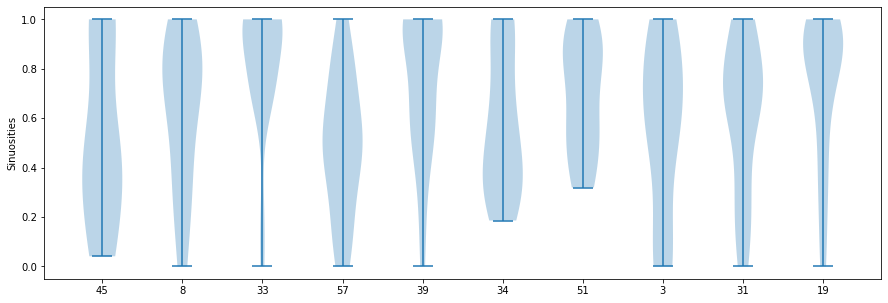

In [43]:
# Violin Plots of Sinuosities by user, illustrate different exploration patterns per person
fig, ax = plt.subplots(figsize=(15, 5), sharey=True, sharex=True)

selected = [C_metrics[i]['path_sinuosities'] for i in sample]
ax.violinplot(selected);
ax.set_xticks(np.arange(1, len(sample) + 1));
ax.set_xticklabels(sample);
ax.set_ylabel('Sinuosities');


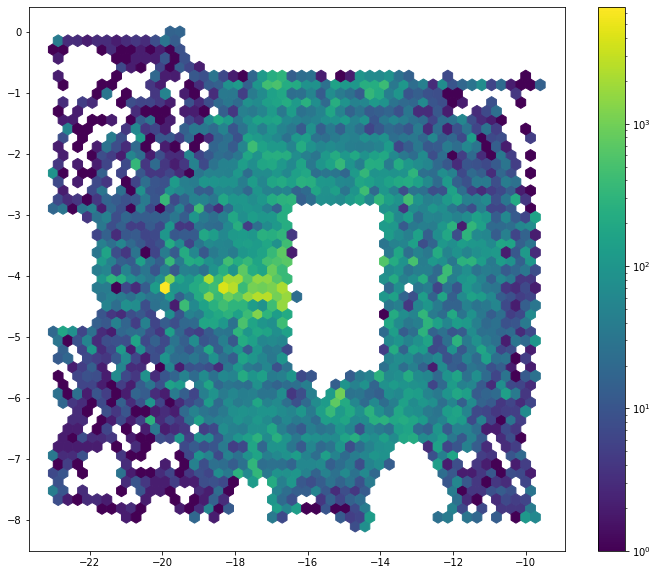

In [44]:
fig, ax = plt.subplots(figsize=(12, 10), sharey=True, sharex=True)

pc = ax.hexbin(df['C_x'], df['C_z'], cmap='viridis', mincnt=1, gridsize=50, bins='log')
fig.colorbar(pc);

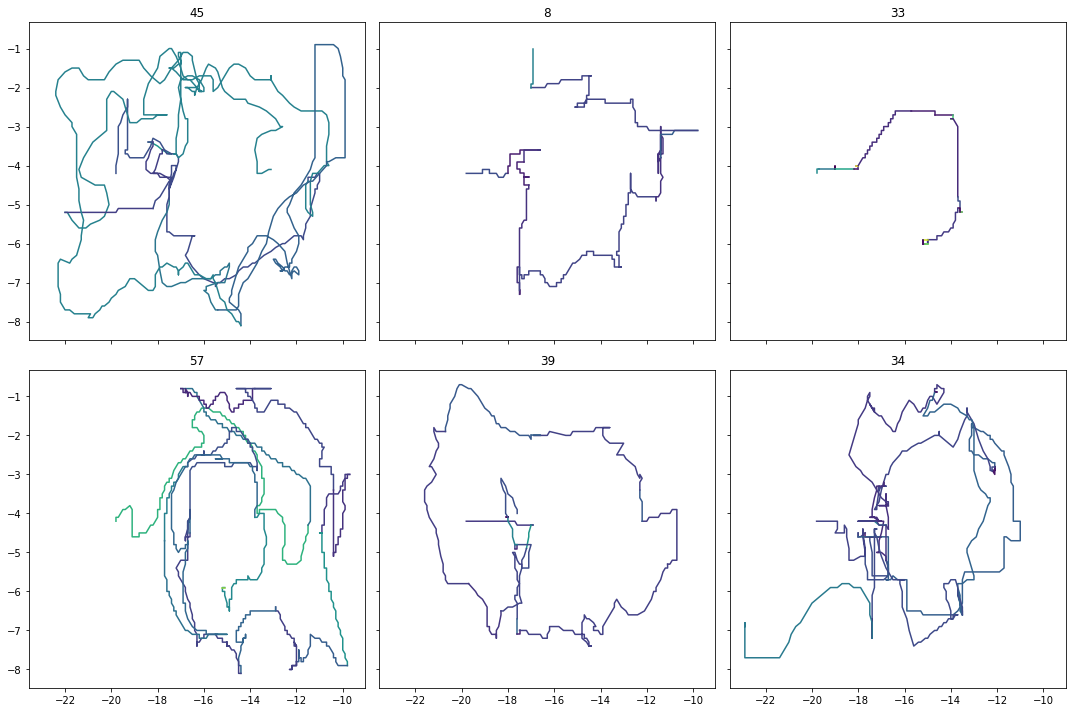

In [45]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10), sharey=True, sharex=True)

maxv, minv = 0, np.inf
for k in sample:
    v = C_metrics[k]
    maxv = max(max(v['path_velocities']), maxv)
    minv = min(min(v['path_velocities']), minv)
norm = plt.Normalize(minv, maxv)
cm_norm = plt.cm.ScalarMappable(norm=norm, cmap='viridis')

for i, k in enumerate(sample[:ax.size]):
    ex = C_metrics[k]
    user_df = df.loc[k]
    for path_start, path_end in zip(ex['path_breaks'], ex['path_breaks'][1:]):
        path_end -= 1
        if path_end > len(ex['ma_v']):
            path_end -= window + 1
        ax[i//ax.shape[1], i % ax.shape[1]
           ].plot(user_df['C_x'].iloc[path_start:path_end], user_df['C_z'].iloc[path_start:path_end], color=cm_norm.to_rgba(ex['path_velocities'][ex['path_breaks'].index(path_start)]))
        ax[i//ax.shape[1], i % ax.shape[1]].set_title(k)

fig.tight_layout()
# fig.colorbar(cm_norm)

In [46]:
for k, ex in C_metrics.items():
    path_times = []
    for path_start, path_end in zip(ex['path_breaks'], ex['path_breaks'][1:]):
        path_end -= 1
        path_times.append(ex['t'][path_end] - ex['t'][path_start])
    C_metrics[k]['path_times'] = path_times

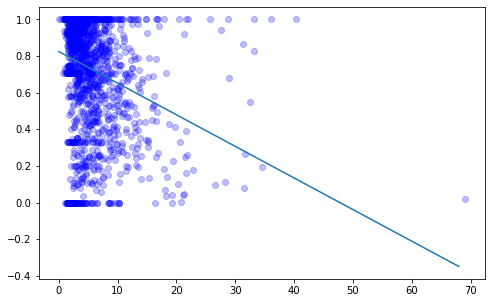

In [47]:
fig, ax = plt.subplots(figsize=(8,5))

all_t, all_sin = [], []
for k, ex in C_metrics.items():
    all_t.extend(ex['path_times'])
    all_sin.extend(ex['path_sinuosities'])

m, b = np.polyfit(all_t, all_sin, 1)
x = np.array([i for i in range(0, round(max(all_t)), 1)])

ax.scatter(all_t, all_sin, color='b', alpha=0.25)
ax.plot(x, m*x + b)

In [48]:
# PELT Path Segmentation Algorithm
# Implementation from https://github.com/nicodesh/pelt-algorithm/blob/master/pelt.py
# https://arxiv.org/pdf/1101.1438.pdf

# def pelt(data, **kwargs):
#     # Pre-processing
#     df = pd.DataFrame(data)
#     df['squared'] = np.square(df[0])
#     df['cumsum'] = np.cumsum(df[0], axis=0)
#     df['cumsumsquared'] = np.cumsum(df['squared'], axis=0)
#     df['diviseur'] = [x for x in range(1,len(df)+1)]
#     df['mean'] = df['cumsum'] / df['diviseur']
#     df['meansquared'] = np.square(df['mean'])
#     df = df.append({
#         0:0,
#         'cumsum':0,
#         'cumsumsquared':0,
#         'diviseur':0,
#         'mean':0,
#         'meansquared':0,
#         'squared':0}, ignore_index=True)
    
#     # Penalty
#     if 'penalty' in kwargs:
#         B = kwargs['penalty']
#     else:
#         B = 2 * np.log(len(data))
    
#     # Initilization
#     Q = [-B] # Actual cost
#     CP = [-1] # Last segment position
#     T = [x for x in range(0,len(data))] # Authorized positions

#     # Parse the data
#     for pos in range(0,len(data)):
        
#         costs = []
#         min_cost_val_temp = float("inf")
#         min_cost_pos_temp = -1
        
#         # Parse all the Yi:pos that are still available
#         for i in T:
#             if i > pos:
#                 break

#             # Square sum minus N times the square mean
#             sos = df['cumsumsquared'].iloc[pos] - df['cumsumsquared'].iloc[i-1]
#             n = pos - i + 1
#             ms = (data[i:pos+1].mean())**2
#             C = sos - (n*ms)

#             # Cost test
#             temp_cost = Q[i] + C + B
#             if min_cost_val_temp > temp_cost:
#                 min_cost_val_temp = temp_cost
#                 min_cost_val_pos = i

#         # Push the smallest cost
#         Q.append(min_cost_val_temp)

#         # Push the position
#         CP.append(min_cost_val_pos)
        
#         # Prunning
#         for i in T:
#             if i >= pos:
#                 break
            
#             iplusone = i+1
#             # Square sum minus N times the square mean
#             sos = df['cumsumsquared'].iloc[pos] - df['cumsumsquared'].iloc[iplusone-1]
#             n = pos - iplusone + 1
#             ms = (data[iplusone:pos+1].mean())**2
#             C = sos - (n*ms)
                
#             if (Q[i] + C > Q[pos]):
#                 T.remove(i)
                
#     return CP

# def backtracking(CP):
#     """ Apply backtracking to a CP vector from OP algorithm. Returns a "segments" vector.
#     Args:
#      CP: array-like 1 dimension.
#     """

#     # Data length
#     n = len(CP)-1

#     # Initialization
#     segments = []
#     changepoint = CP[n]

#     # While the changepoint doesn't return the first point
#     while changepoint > 0:

#         segments.append(changepoint-1)
#         changepoint = CP[changepoint]

#     # The new vector was built with .append(), but since we parse from the end to the beginning,
#     # We need to reverse it.
#     segments.reverse()
    
#     return segments

# def plot_segments(data, segments, ylim=False):
#     """ Plot segments generated by the OP & backtracking algorithms.
#     Args:
#         data: the data used to fit the model.
#         segments: the segments returned by backtracking().
#     """
    
#     fig, ax = plt.subplots(figsize=(15,5))
#     start = 0

#     for end in segments:
#         mean = data[start:end+1].sum() / len(data[start:end+1])
#         plt.plot((start, end), (mean, mean))
#         start = end+1

#     end = len(data)-1
#     mean = data[start:end+1].sum() / len(data[start:end+1])
#     plt.plot((start, end), (mean, mean))
    
#     if ylim != False:
#         plt.ylim(ylim)
#     plt.show()

# cp = pelt(np.array(C_metrics['34']['v']))
# segments = backtracking(cp)
# plot_segments(np.array(C_metrics['34']['v']), segments)

In [ ]:
# BDSCAN Clustering for segmentation

from sklearn.cluster import DBSCAN

In [581]:
for k in C_metrics.keys():
    clustering = DBSCAN().fit(df.loc[k].iloc[:, 1:4].to_numpy())
    labels = clustering.labels_
    breaks = np.append(np.insert(np.where((labels[1:]-labels[:-1])==1), 0, 0), len(labels))
    breaks_labels = [(br, labels[br]) for br in breaks[:-1]]
    C_metrics[k]['DBSCAN'] = breaks_labels

In [583]:
breaks

array([   0,    0,    1,    4,   56,   60,   64,  146, 1214, 1314, 1538,
       1618, 1639, 1749, 1855, 1873, 2093, 2200, 2210, 2215, 2466, 2479,
       2489, 2507, 2540, 2564, 2964, 3314])

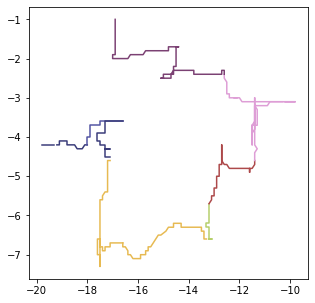

In [499]:
fig, ax = plt.subplots(figsize=(5, 5))

cmap = plt.cm.get_cmap('tab20b', len(set(clustering.labels_))).colors

for path_start, path_end in zip(breaks, breaks[1:]):
    path_end -= 1
    c = clustering.labels_[path_start]
    ax.plot(df.loc['8'].iloc[path_start:path_end]['C_x'], df.loc['8'].iloc[path_start:path_end]['C_z'], color=cmap[c])
    

# for c in set(clustering.labels_):
#     ixs = np.where(clustering.labels_ == c)
#     ax.plot(df.loc['8'].iloc[ixs]['C_x'], df.loc['8'].iloc[ixs]['C_z'], color=cmap[c])

# for i, k in enumerate(sample[:ax.size]):
#     ex = C_metrics[k]
#     user_df = df.loc[k]
#     for path_start, path_end in zip(ex['path_breaks'], ex['path_breaks'][1:]):
#         path_end -= 1
#         if path_end > len(ex['ma_v']):
#             path_end -= window + 1
        
#         ax[i//ax.shape[1], i%ax.shape[1]].plot(user_df['C_x'].iloc[path_start:path_end], user_df['C_z'].iloc[path_start:path_end])
#         ax[i//ax.shape[1], i%ax.shape[1]].set_title(k)
# fig.tight_layout()

## Similarity Analysis of Movement Data

# POG Movement Analysis

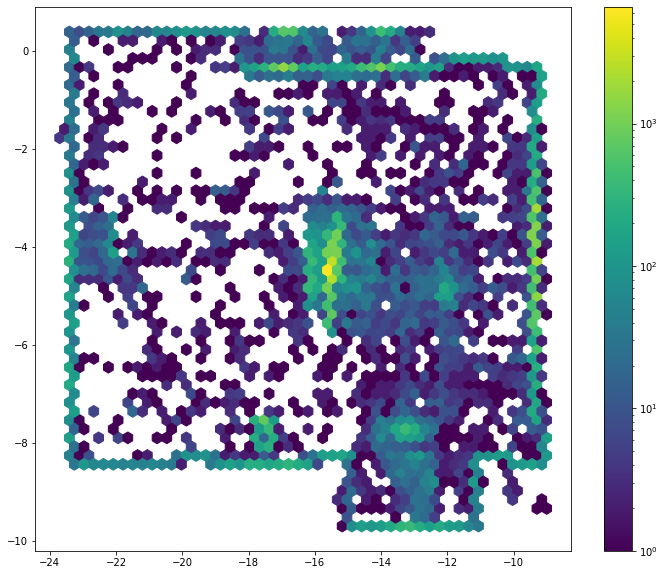

In [49]:
fig, ax = plt.subplots(figsize=(12, 10), sharey=True, sharex=True)

pc = ax.hexbin(df['L_x'], df['L_z'], cmap='viridis', mincnt=1, gridsize=50, bins='log')
fig.colorbar(pc);

In [49]:
# to correlate the full camera position data with the interrupted PoG data we use the nearest index matched by time
def get_nearest_time_index(time, L_times):
    return np.min(np.abs(np.array(L_times) - time))

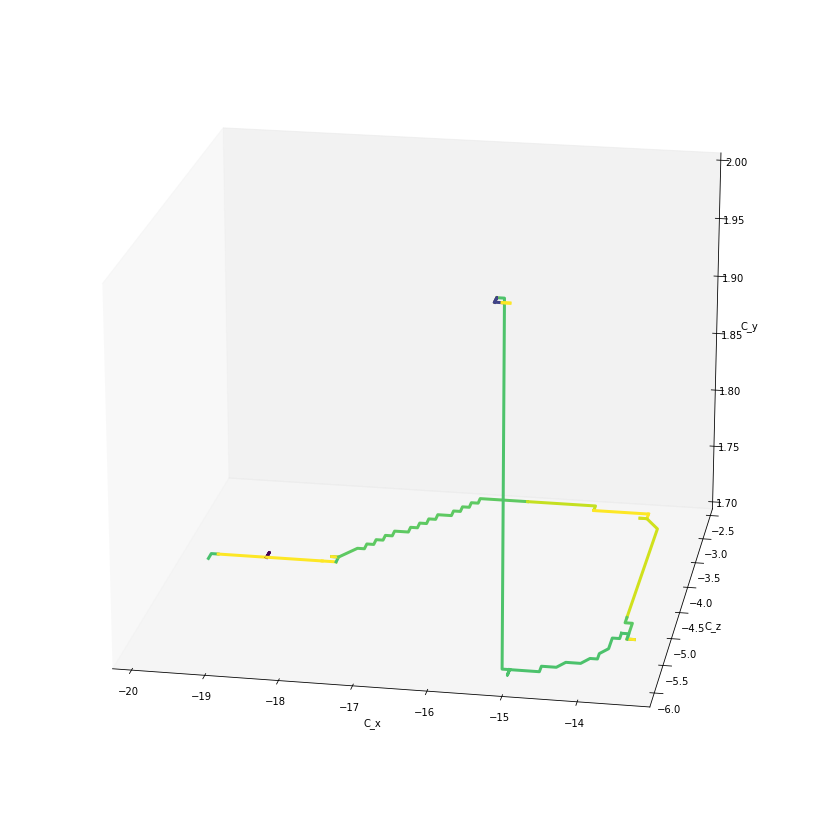

In [90]:
from celluloid import Camera

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
norm = plt.Normalize(0, 1)
cm_norm = plt.cm.ScalarMappable(norm=norm, cmap='viridis')

k='33'
ex = C_metrics[k]
user_df = df.loc[k]

ax.set_xlabel('C_x')
ax.set_ylabel('C_z')
ax.set_zlabel('C_y')
ax.grid(False)
ax.view_init(20, 280)

for path_start, path_end in zip(ex['path_breaks'], ex['path_breaks'][1:]):
    path_end -= 1

    ax.plot(user_df['C_x'].iloc[path_start:path_end], user_df['C_z'].iloc[path_start:path_end], user_df['C_y'].iloc[path_start:path_end], \
        color=cm_norm.to_rgba(ex['path_sinuosities'][ex['path_breaks'].index(path_start)]), \
            linewidth=3)

# for i, row in user_df[~user_df['L_x'].isna()].iterrows():
#     ax.plot((row['C_x'], row['L_x']), (row['C_z'], row['L_z']), (row['C_y'], row['L_y']), color='blue', alpha=0.1)



In [ ]:
# Do users tend to walk towards where they are looking

# average cos(orientation of movement - orientation of eye direction)

